In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

/home/jb07/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [30]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [34]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [94]:
# Split into training and test sets
X_train,X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=42)

In [83]:
n = len(X_train)
# 10-fold CV, with shuffle
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_validation.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring=mean_squared_error).mean()
    mse.append(-score)

    # Plot results
plt.plot(np.arange(1, 20), np.array(mse), -v)
plt.xlabel(Number of principal components in regression)
plt.ylabel(MSE)
plt.title(Salary)
plt.xlim(xmin=-1)

SyntaxError: invalid syntax (<ipython-input-83-3871845ae811>, line 8)

In [46]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

150537.68568740849

## Compare to randomly shuffled data

In [52]:
x_original = X_train.values
y_original = y_train.values

(-1, 20.0)

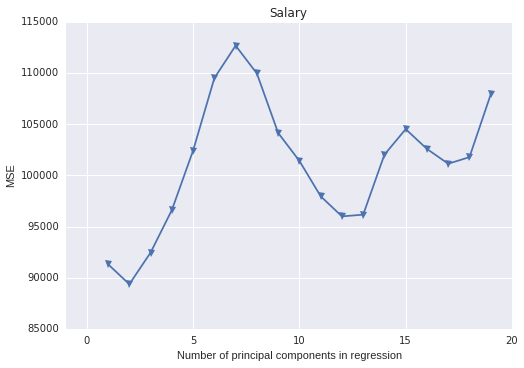

In [85]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_validation.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [89]:
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
pls = PLSRegression(n_components=2)


In [90]:
true_mse

-89358.565321958275

In [117]:
permuted_mse = list()

for i in np.arange(0, 100):
    X_permuted = X_train.copy()
    X_permuted = X_permuted.reindex(np.random.permutation(X_train.index))
    pls = PLSRegression(n_components=2)
    mse = cross_validation.cross_val_score(pls, scale(X_permuted), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    permuted_mse.append(-mse)

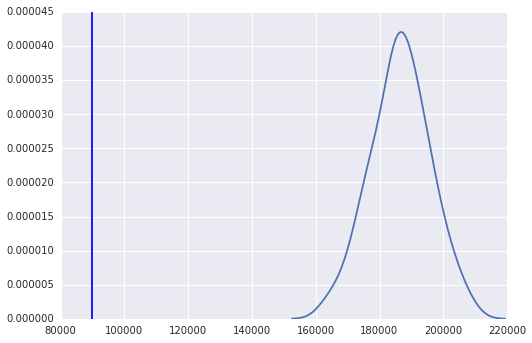

In [118]:
sns.kdeplot(np.asarray(permuted_mse))
plt.axvline(-true_mse)

In [115]:
?cross_validation.cross_val_score